# First, let's import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

# Then we have to load the dataset

In [3]:
df = pd.read_csv("/Users/chirayusharma/Downloads/Data-Collisions.csv")

/Users/chirayusharma/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

## We are only going to need to columns of SEVERITYCODE, WEATHER, ROADCOND and LIGHTCOND. So either we can drop rest of the columns or create a new dataframe.


In [6]:
df_2 = df[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND']]

In [7]:
df_2

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight
...,...,...,...,...
194668,2,Clear,Dry,Daylight
194669,1,Raining,Wet,Daylight
194670,2,Clear,Dry,Daylight
194671,2,Clear,Dry,Dusk


In [8]:
df_2.dtypes

SEVERITYCODE     int64
WEATHER         object
ROADCOND        object
LIGHTCOND       object
dtype: object

## As we have converted them into integers, let's check for the number of values and remove any NaN values if there are any.


In [9]:
df_2.count()

SEVERITYCODE    194673
WEATHER         189592
ROADCOND        189661
LIGHTCOND       189503
dtype: int64

In [10]:
df_final = df_2.dropna()

In [11]:
df_final

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight
...,...,...,...,...
194668,2,Clear,Dry,Daylight
194669,1,Raining,Wet,Daylight
194670,2,Clear,Dry,Daylight
194671,2,Clear,Dry,Dusk


In [12]:
df_final.isnull().values.any()

False

In [13]:
df_final.isnull().sum()

SEVERITYCODE    0
WEATHER         0
ROADCOND        0
LIGHTCOND       0
dtype: int64

In [14]:
df_final.count()

SEVERITYCODE    189337
WEATHER         189337
ROADCOND        189337
LIGHTCOND       189337
dtype: int64

## Let's check for their data types 

In [15]:
df_final.dtypes

SEVERITYCODE     int64
WEATHER         object
ROADCOND        object
LIGHTCOND       object
dtype: object

## Let's visualize the data.

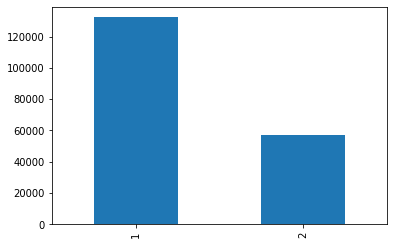

In [16]:
df_final['SEVERITYCODE'].value_counts().plot(kind = "bar")

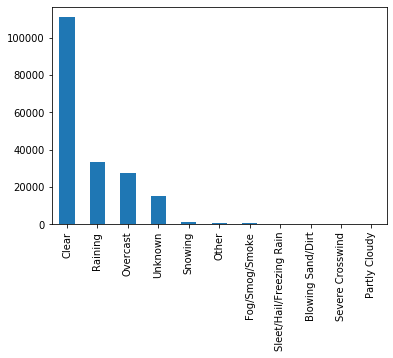

In [17]:
df_final['WEATHER'].value_counts().plot(kind = "bar")

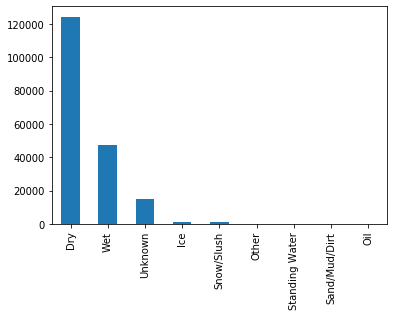

In [18]:
df_final['ROADCOND'].value_counts().plot(kind = "bar")

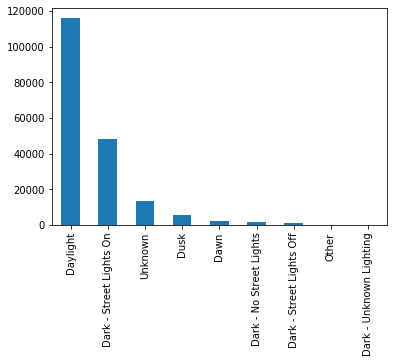

In [20]:
df_final['LIGHTCOND'].value_counts().plot(kind = "bar")

In [24]:
df_final['SEVERITYCODE'].value_counts()

1    132285
2     57052
Name: SEVERITYCODE, dtype: int64

In [25]:
df_final['WEATHER'].value_counts()

Clear                       111008
Raining                      33117
Overcast                     27681
Unknown                      15039
Snowing                        901
Other                          824
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               55
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [26]:
df_final['ROADCOND'].value_counts()

Dry               124300
Wet                47417
Unknown            15031
Ice                 1206
Snow/Slush           999
Other                131
Standing Water       115
Sand/Mud/Dirt         74
Oil                   64
Name: ROADCOND, dtype: int64

In [27]:
df_final['LIGHTCOND'].value_counts()

Daylight                    116077
Dark - Street Lights On      48440
Unknown                      13456
Dusk                          5889
Dawn                          2502
Dark - No Street Lights       1535
Dark - Street Lights Off      1192
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [28]:
df_final.dtypes

SEVERITYCODE     int64
WEATHER         object
ROADCOND        object
LIGHTCOND       object
dtype: object

## As we can see the data types are not integers, we need to convert it to integer

In [29]:
df_final["WEATHER"] = df["WEATHER"].astype('category').cat.codes
df_final["ROADCOND"] = df["ROADCOND"].astype('category').cat.codes
df_final["LIGHTCOND"] = df["LIGHTCOND"].astype('category').cat.codes

/Users/chirayusharma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/chirayusharma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/chirayusharma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [30]:
df_final.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,4,8,5
1,1,6,8,2
2,1,4,0,5
3,1,1,0,5
4,2,6,8,5


df_final.dtypes

In [36]:
df_final.count()

SEVERITYCODE    189337
WEATHER         189337
ROADCOND        189337
LIGHTCOND       189337
dtype: int64

## Now, we can apply Machine Learning models to our data

### We can use SEVERITYCODE as our target to predict the outcome. The models we can use here are KNN, Decision Trees and Logistic Regression. 

### (a) Using KNN, we can predict the SEVERITYCODE of an outcome as it finds the most similar data point within k distance.

### (b) Using Decision trees, we can get a layout of all possible outcomes. In this, it will observe all possible outcomes of Road, Weather and Visibilty conditions.

### (c) Finally, with the help of Logistic Regression we can predict one of the two values as there are only two values for the SEVERITYCODE.

In [38]:
df_final['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1,132285
2,57052


In [39]:
## As we can see that there is no balance in the SEVERITYCODE. This can hamper the result.
## So, we need to balance it by downsampling the majority

In [40]:
# For this, we need to import the package

from sklearn.utils import resample

In [41]:
df_final_majority = df_final[df_final.SEVERITYCODE==1]
df_final_minority = df_final[df_final.SEVERITYCODE==2]

In [42]:
## Now, let's Downsample majority class
df_final_majority_downsampled = resample(df_final_majority,
                                        replace=False,
                                        n_samples=57052,
                                        random_state=123)

In [43]:
## Now, let's combine minority class with downsampled majority class
df_final_balanced = pd.concat([df_final_majority_downsampled, df_final_minority])

In [48]:
df_final_balanced['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
2,57052
1,57052


## Now, it's time to train and test the model

### For that, let's normalize

In [63]:
df_final_balanced.count()

SEVERITYCODE    114104
WEATHER         114104
ROADCOND        114104
LIGHTCOND       114104
dtype: int64

In [56]:
X = np.asarray(df_final_balanced[['WEATHER', 'ROADCOND', 'LIGHTCOND']])
X[0:5]

array([[1, 0, 5],
       [1, 0, 5],
       [1, 0, 5],
       [4, 0, 5],
       [6, 8, 2]], dtype=int8)

In [58]:
y = np.asarray(df_final_balanced['SEVERITYCODE'])
y [0:5]

array([1, 1, 1, 1, 1])

In [64]:
from sklearn import preprocessing

In [65]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.71907961, -0.69272349,  0.39316776],
       [-0.71907961, -0.69272349,  0.39316776],
       [-0.71907961, -0.69272349,  0.39316776],
       [ 0.39080216, -0.69272349,  0.39316776],
       [ 1.13072334,  1.5045195 , -1.43589428]])

### Now, we have to train and test the data by dividing 80% for Training and 20% for Testing

In [66]:
## Let's import the package

from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (91283, 3) (91283,)
Test set: (22821, 3) (22821,)


### Now we have to build the models :

### KNN Model :


In [75]:
## let's import the package

from sklearn.neighbors import KNeighborsClassifier

In [76]:
## Lets consider k value to be 20

k = 20

In [77]:
## Now, we have to train the model and then predict

knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [78]:
Knn_yhat = knn.predict(X_test)
Knn_yhat[0:5]

array([2, 2, 1, 1, 1])

### Decision tree Model :

In [79]:
## Let's import the package

from sklearn.tree import DecisionTreeClassifier

In [80]:
Dec_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
Dec_Tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [81]:
## Now we have to train the model and predict


Dec_Tree.fit(X_train,y_train)

Dec_Tree_yhat = Dec_Tree.predict(X_test)

In [84]:
Dec_Tree_yhat [0:5]

array([1, 2, 2, 2, 2])

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=5, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
LR_yhat = LR.predict(X_test)
LR_yhat

array([2, 1, 1, ..., 2, 2, 2])

In [89]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.43407687, 0.56592313],
       [0.55117425, 0.44882575],
       [0.57834919, 0.42165081],
       ...,
       [0.49599534, 0.50400466],
       [0.4725284 , 0.5274716 ],
       [0.43407687, 0.56592313]])

## Results and evaluation through metrics

In [133]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

### For KNN Model :


In [134]:
print("For KNN Model, below are the metrics: ")
print("Jaccard Similarity Score:" ,jaccard_similarity_score(y_test, Knn_yhat))
print("F1-Score : ", f1_score(y_test, Knn_yhat, average='macro'))

For KNN Model, below are the metrics: 
Jaccard Similarity Score: 0.5054993208010166
F1-Score :  0.4795258816494271


### For Decision Tree Model :

In [146]:
print("For Decision Tree Model, below are the metrics: ")
print("Jaccard Similarity  Score: ", jaccard_similarity_score(y_test, Dec_Tree_yhat))
print("F1-Score : ", f1_score(y_test, Dec_Tree_yhat, average='macro'))

For Decision Tree Model, below are the metrics: 
Jaccard Similarity  Score:  0.5604925288111827
F1-Score :  0.5257715304320439


### For Logistic Regression :

In [152]:
print("For Logistic Regression, below are the metrics: ")
print("Jaccard Similarity score : ", jaccard_similarity_score(y_test, LR_yhat))
print("F1-Score : ",f1_score(y_test, LR_yhat, average='macro'))

yhat_prob = LR.predict_proba(X_test)
print("Log Loss: ", log_loss(y_test, yhat_prob))

For Logistic Regression, below are the metrics: 
Jaccard Similarity score :  0.5360413654090531
F1-Score :  0.5233137197110393
Log Loss:  0.6819423921545464
